# Problem Statement

You are part of Quantium’s retail analytics team and have been approached by your client, the Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region. The insights from your analysis will feed into the supermarket’s strategic plan for the chip category in the next half year.

Conduct analysis on client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.

# Work Flow

- Examining Transaction data - looking for inconsistencies, missing values, duplicate values
- Examining Purchase behaviour data - checking for similar issues
- Merging the two data sets - merging the transaction and customer data together so it’s ready for the analysis 
- Data analysis and customer segments - exploring the data, creating charts and graphs, interesting trends and insights
- Feature engg - adding extra features such as packs size and brand name
- Deep dive into customer segments – defining recommendation from insights, determining which segments we should be targeting, if packet sizes are relative and form an overall conclusion based analysis.

# Examining Transaction Data

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [2]:
# reading the transaction data
trans_data = pd.read_excel('QVI_transaction_data.xlsx')
trans_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [3]:
# finding the shape of the data
trans_data.shape

(264836, 8)

In [4]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [5]:
# checking for missing values in the transaction data
trans_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

Here, we find no null values (missing data) in the dataset

In [6]:
# checking for duplicates 
len(trans_data)-len(trans_data.drop_duplicates())

1

There is one duplicate. We will remove it

# Examining Purchase behaviour Data

- LIFESTAGE: Customer attribute that identifies whether a customer has a family or not and what point in life they are at e.g. are their children in pre-school/primary/secondary school.
- PREMIUM_CUSTOMER: Customer segmentation used to differentiate shoppers by the price point of products they buy and the types of products they buy. It is used to identify whether customers may spend more for quality or brand or whether they will purchase the cheapest options.

In [7]:
# reading the customer data
cust_data = pd.read_csv('QVI_purchase_behaviour.csv')
cust_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [8]:
# finding the shape of the data
cust_data.shape

(72637, 3)

In [9]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [10]:
# checking for missing values in the customer data
cust_data.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Here, we find no null values (missing data) in the dataset

In [11]:
# checking for duplicates 
len(cust_data)-len(cust_data.drop_duplicates())

0

No duplicates in this table

# Merging of datasets

In [12]:
# merging the transaction data with customer data
data = pd.merge(trans_data, cust_data, on='LYLTY_CARD_NBR')
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [13]:
data.shape

(264836, 10)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


# EDA

In [15]:
# statistical measures of trans_data
data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


**Numerical Variables**

In [16]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  7


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,2,6.0
1,43599,1,1307,348,66,3,6.3
2,43414,1,1307,346,96,2,3.8
3,43533,1,1307,347,54,1,2.1
4,43605,1,1343,383,61,2,2.9


In [17]:
# Standardising dates values to YYYY-MM-DD format 
from datetime import date, timedelta
start = date(1899,12,30)

new_date_format = []

for date in data["DATE"]:
    delta = timedelta(date)
    new_date_format.append(start + delta)

In [18]:
data["DATE"] = pd.to_datetime(pd.Series(new_date_format))
data["DATE"].head()

0   2018-10-17
1   2019-05-14
2   2018-11-10
3   2019-03-09
4   2019-05-20
Name: DATE, dtype: datetime64[ns]

In [19]:
# Numerical variables are usually of 2 type
# 1. Discrete Variables

discrete_feature = [feature for feature in numerical_features if len(data[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


In [20]:
discrete_feature

['PROD_QTY']

In [21]:
# 2. Continuos Variables
continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature and feature != 'DATE']
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 5


In [22]:
continuous_feature

['STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'TOT_SALES']

In [23]:
print(data.STORE_NBR.nunique())
print(data.LYLTY_CARD_NBR.nunique())
print(data.TXN_ID.nunique())
print(data.PROD_NBR.nunique())
print(data.TOT_SALES.nunique())

272
72637
263127
114
112


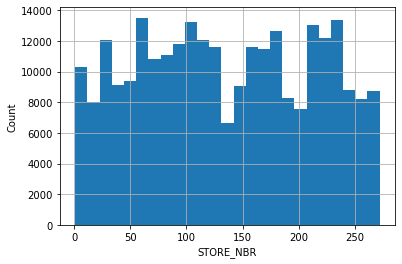

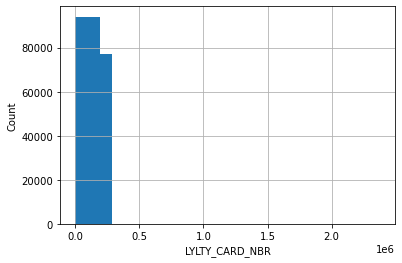

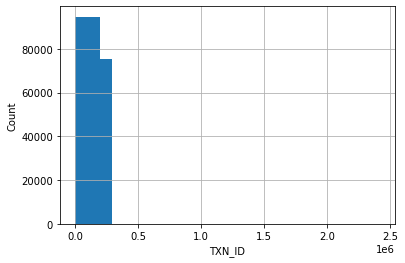

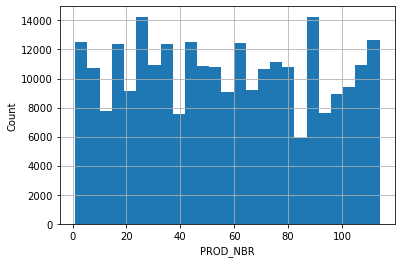

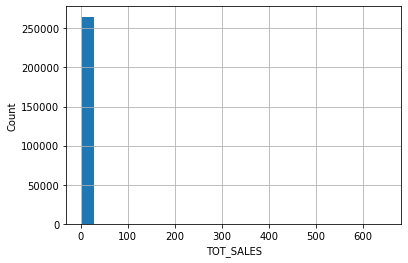

In [24]:
# Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    df=data.copy()
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

**Outliers**

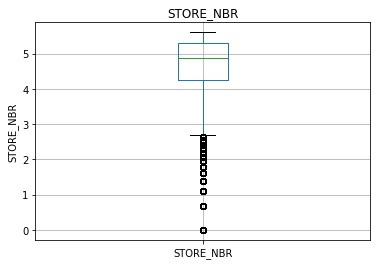

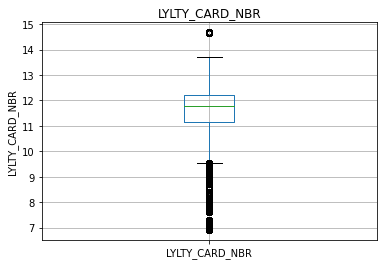

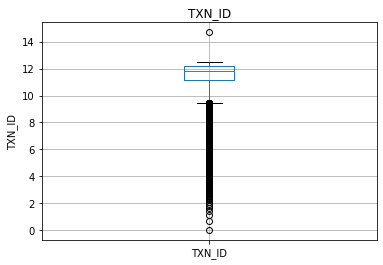

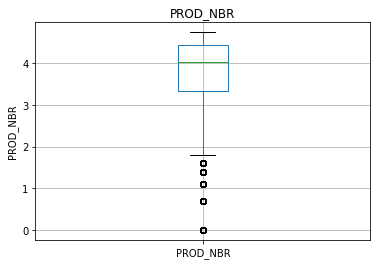

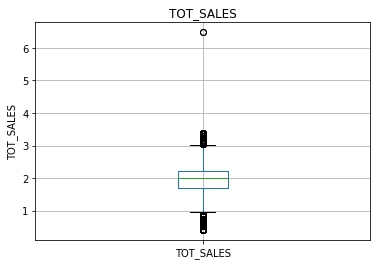

In [25]:
# only for continuous features
for feature in continuous_feature:
    df = data.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

**Categorical Variables**

In [26]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['PROD_NAME', 'LIFESTAGE', 'PREMIUM_CUSTOMER']

In [27]:
data[categorical_features].head()

,PROD_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,Natural Chip Compny SeaSalt175g,YOUNG SINGLES/COUPLES,Premium
1,CCs Nacho Cheese 175g,MIDAGE SINGLES/COUPLES,Budget
2,WW Original Stacked Chips 160g,MIDAGE SINGLES/COUPLES,Budget
3,CCs Original 175g,MIDAGE SINGLES/COUPLES,Budget
4,Smiths Crinkle Cut Chips Chicken 170g,MIDAGE SINGLES/COUPLES,Budget


In [28]:
for feature in categorical_features:
    print(feature,':',len(data[feature].unique()))

PROD_NAME : 114
LIFESTAGE : 7
PREMIUM_CUSTOMER : 3


In [29]:
# summary of LIFE_STAGE
data.LIFESTAGE.value_counts().sort_values(ascending=False)

OLDER SINGLES/COUPLES     54479
RETIREES                  49763
OLDER FAMILIES            48596
YOUNG FAMILIES            43592
YOUNG SINGLES/COUPLES     36377
MIDAGE SINGLES/COUPLES    25110
NEW FAMILIES               6919
Name: LIFESTAGE, dtype: int64

In [30]:
# summary of PREMIUM_CUSTOMER
data.PREMIUM_CUSTOMER.value_counts().sort_values(ascending=False)

Mainstream    101988
Budget         93157
Premium        69691
Name: PREMIUM_CUSTOMER, dtype: int64

# **Data Visualization**

In [31]:
# for DATE Column
print(data.DATE.min(), trans_data.DATE.max())

2018-07-01 00:00:00 43646


<AxesSubplot:>

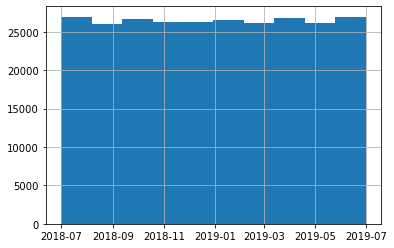

In [32]:
data.DATE.hist()
# looks pretty much balanced
#  we have the transaction data of a year from july 18 to june 19

In [33]:
data.DATE.describe(datetime_is_numeric=False)

<ipython-input-33-5bc91825af6e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.DATE.describe(datetime_is_numeric=False)


count                  264836
unique                    364
top       2018-12-24 00:00:00
freq                      939
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object

In [34]:
# 1 date is missing as there are 364 unique dates. lets find out the missing date
dates = data[['DATE']]
dates.drop_duplicates('DATE', inplace=True)
dates['month'] = dates.DATE.dt.month_name()
grp = dates.groupby('month').count()
grp

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
<ipython-input-34-080a55c455a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates['month'] = dates.DATE.dt.month_name()


,DATE
month,
April,30
August,31
December,30
February,28
January,31
July,31
June,30
March,31
May,31


In [35]:
# looks like we don't have all the dates in the month of December
# lets deepdive in December month
dates[dates.month=='December'].sort_values(['DATE'])

,DATE,month
98,2018-12-01,December
698,2018-12-02,December
584,2018-12-03,December
126,2018-12-04,December
127,2018-12-05,December
128,2018-12-06,December
173,2018-12-07,December
735,2018-12-08,December
462,2018-12-09,December
165,2018-12-10,December


**missing 25 dec. its a holiday. so no sales on that day**

In [36]:
# Using the difference method we see the missing date.
pd.date_range(start=data["DATE"].min(), end=data["DATE"].max()).difference(data["DATE"])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [37]:
# plotting the data to see the missing date
check_null_date = pd.merge(pd.Series(pd.date_range(start=data["DATE"].min(), end=data["DATE"].max()), name="DATE"), data, on="DATE", how="left")

<ipython-input-38-502b977c9a27>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dec = trans_by_date[(trans_by_date.index >= pd.datetime(2018,12,1)) & (trans_by_date.index < pd.datetime(2019,1,1))].sort_index()


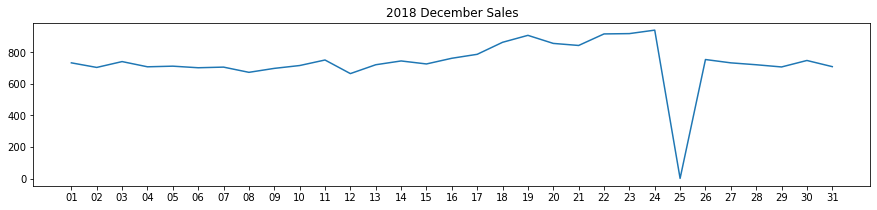

In [38]:
trans_by_date = check_null_date["DATE"].value_counts()
dec = trans_by_date[(trans_by_date.index >= pd.datetime(2018,12,1)) & (trans_by_date.index < pd.datetime(2019,1,1))].sort_index()
dec.index = dec.index.strftime('%d')
ax = dec.plot(figsize=(15,3))
ax.set_xticks(np.arange(len(dec)))
ax.set_xticklabels(dec.index)
plt.title("2018 December Sales")
plt.savefig("2018 December Sales.png", bbox_inches="tight")
plt.show()

In [39]:
check_null_date["DATE"].value_counts().sort_values().head()

2018-12-25      1
2018-11-25    648
2018-10-18    658
2019-06-13    659
2019-06-24    662
Name: DATE, dtype: int64

The date with the no transaction falls on Christmas day, the day when the store is closed. Knowing there's no anomaly in this, we leave it be.

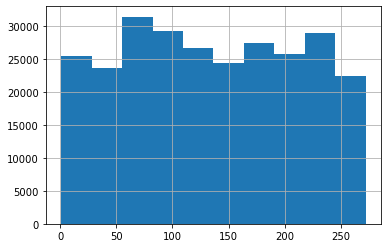

In [40]:
# for STORE_NBR column
trans_data.STORE_NBR.hist()
plt.show()

(array([2.38065e+05, 2.67270e+04, 0.00000e+00, 1.30000e+01, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 3.10000e+01]),
 array([1.0000000e+03, 2.3827110e+05, 4.7554220e+05, 7.1281330e+05,
        9.5008440e+05, 1.1873555e+06, 1.4246266e+06, 1.6618977e+06,
        1.8991688e+06, 2.1364399e+06, 2.3737110e+06]),
 <BarContainer object of 10 artists>)

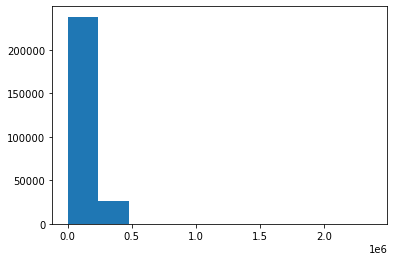

In [41]:
# visulization of LYLTY_CARD_NBR
plt.hist(data.LYLTY_CARD_NBR)

<AxesSubplot:>

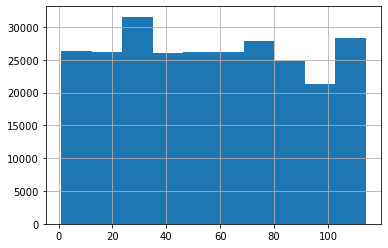

In [42]:
# for PROD_NBR column
trans_data.PROD_NBR.hist()

In [43]:
data["PROD_QTY"].value_counts(bins=4).sort_index()

(0.8, 50.75]       264834
(50.75, 100.5]          0
(100.5, 150.25]         0
(150.25, 200.0]         2
Name: PROD_QTY, dtype: int64

From the binning above we see all the PROD_QTY values fall below 50.75, only 2 values are above 200

In [44]:
data.sort_values(by="PROD_QTY", ascending=False).head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
71456,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.00,OLDER FAMILIES,Premium
71457,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.00,OLDER FAMILIES,Premium
34105,2018-08-15,97,97211,97600,11,RRD Pc Sea Salt 165g,5,15.00,OLDER FAMILIES,Budget
102451,2018-08-17,235,235164,238117,4,Dorito Corn Chp Supreme 380g,5,16.25,OLDER SINGLES/COUPLES,Mainstream
259068,2019-05-14,183,183032,184969,21,WW Sour Cream &OnionStacked Chips 160g,5,9.50,YOUNG SINGLES/COUPLES,Premium


2 outliers (value = 200) are present in PROD_QTY. These values need to be removed. Both entries are by the same customer, we will examine this customer's other transactions.

In [45]:
data = data[data["PROD_QTY"] < 6]
data.sort_values(by="PROD_QTY", ascending=False).head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
100224,2019-05-16,89,89246,88392,54,CCs Original 175g,5,10.5,OLDER SINGLES/COUPLES,Mainstream
136545,2018-08-14,154,154199,154279,20,Doritos Cheese Supreme 330g,5,28.5,RETIREES,Budget
57232,2018-08-19,167,167288,169110,109,Pringles Barbeque 134g,5,18.5,OLDER FAMILIES,Mainstream
185396,2019-05-20,44,44350,40394,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,YOUNG FAMILIES,Budget
205107,2019-05-15,106,106241,108183,95,Sunbites Whlegrn Crisps Frch/Onin 90g,5,8.5,YOUNG FAMILIES,Mainstream


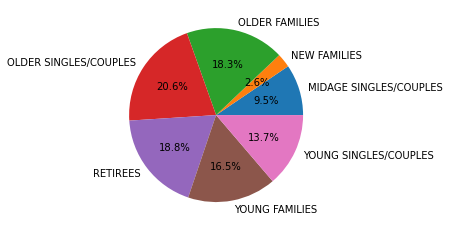

In [46]:
# visulization of LIFESTAGE
plt.pie(data.LIFESTAGE.value_counts().sort_index().values, autopct='%1.1f%%', 
        labels=data.LIFESTAGE.value_counts().sort_index().index)
plt.show()

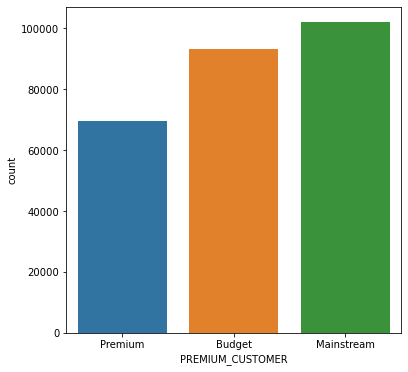

In [47]:
plt.figure(figsize=(6,6))
sb.countplot(x='PREMIUM_CUSTOMER', data=data)
plt.show()

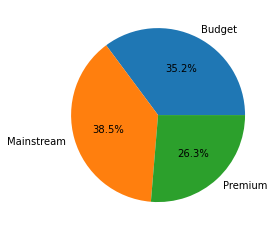

In [48]:
plt.pie(data.PREMIUM_CUSTOMER.value_counts().sort_index().values, autopct='%1.1f%%', 
        labels=data.PREMIUM_CUSTOMER.value_counts().sort_index().index)
plt.show()

# Customer Segmentation

In [49]:
# checking the prod_name column to make sure all items are chips
data["PROD_NAME"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g', 'WW Original Stacked Chips 160g',
       'CCs Original 175g', 'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Tyrrells Crisps     Lightly Salted 165g',
       'Kettle Tortilla ChpsFeta&Garlic 150g',
       'Dorito Corn Chp     Supreme 380g', 'Doritos Mexicana    170g',
       'Smiths Crinkle Chips Salt & Vinegar 330g', 'Kettle Original 175g',
       'Tyrrells Crisps     Ched & Chives 165g',
       'Infuzions BBQ Rib   Prawn Crackers 110g',
       'Grain Waves         Sweet Chilli 210g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Thins Potato Chips  Hot & Spicy 175g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Red Rock Deli Thai  Chilli&Lime 150g',
       'GrnWves Plus Btroot

In [50]:
# Examine the words in PROD_NAME to see if there are any incorrect entries, such as products that are not chips
# removing digits and special characters
split_prods = data["PROD_NAME"].str.replace(r'([0-9]+[gG])','').str.replace(r'[^\w]', ' ').str.split()

<ipython-input-50-1ad8ddfcd1f1>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  split_prods = data["PROD_NAME"].str.replace(r'([0-9]+[gG])','').str.replace(r'[^\w]', ' ').str.split()


In [51]:
# Let's look at the most common words by counting the number of times a word appears and
# sorting them by this frequency in order of highest to lowest frequency
word_counts = {}

def count_words(line):
    for word in line:
        if word not in word_counts:
            word_counts[word] = 1
        else:
            word_counts[word] += 1
            
split_prods.apply(lambda line: count_words(line))
print(pd.Series(word_counts).sort_values(ascending=False))

Chips       49770
Kettle      41288
Smiths      28860
Salt        27976
Cheese      27890
            ...  
Sunbites     1432
Pc           1431
NCC          1419
Garden       1419
Fries        1418
Length: 198, dtype: int64


In [52]:
# There are salsa products in the dataset but we are only interested in the chips category, so let's remove these.
# removing Salsa products
data = data[~data["PROD_NAME"].str.contains(r"[Ss]alsa")]

<ipython-input-53-9a8f28891e2b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data["PROD_NAME"] = data["PROD_NAME"].str.replace(r'[0-9]+(G)','g')


count    240676.000000
mean        175.302286
std          60.014468
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: 0, dtype: float64


<AxesSubplot:ylabel='Frequency'>

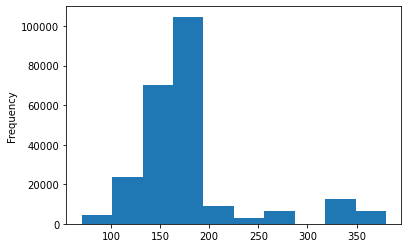

In [53]:
# exploring the product pack size
data["PROD_NAME"] = data["PROD_NAME"].str.replace(r'[0-9]+(G)','g')
pack_sizes = data["PROD_NAME"].str.extract(r'([0-9]+[gG])')[0].str.replace("g","").astype("float")
print(pack_sizes.describe())
pack_sizes.plot.hist()

**Product pack size looks reasonable with highest transaction frequency in mid-sized pack. Smallest size is 70g, and biggest size is 380g.**

In [54]:
# exploring the product brand names
data["PROD_NAME"].str.split().str[0].value_counts().sort_index()

Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3183
Doritos       22041
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Pringles      25102
RRD           11894
Red            4427
Smith          2963
Smiths        27390
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     1516
Name: PROD_NAME, dtype: int64

As we look further than the first word in product name, we can see that some product brands are written in more than one way. 
- Dorito and Doritos - Grain and GrnWves - Infuzions and Infzns - Natural and NCC - Red and RRD - Smith and Smiths - Snbts and Sunbites - WW and Woolworths.

In [55]:
data["PROD_NAME"].str.split()[data["PROD_NAME"].str.split().str[0] == "Grain"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Grain, Waves, Sweet, Chilli, 210g]      3167
[Grain, Waves, Sour, Cream&Chives, g]    3105
Name: PROD_NAME, dtype: int64

In [56]:
data["PROD_NAME"].str.split()[data["PROD_NAME"].str.split().str[0] == "Natural"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Natural, Chip, Co, Tmato, Hrb&Spce, 175g]       1572
[Natural, ChipCo, Sea, Salt, &, Vinegr, 175g]    1550
[Natural, Chip, Compny, SeaSalt175g]             1468
[Natural, ChipCo, Hony, Soy, Chckn175g]          1460
Name: PROD_NAME, dtype: int64

In [57]:
data["PROD_NAME"].str.split()[data["PROD_NAME"].str.split().str[0] == "Red"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Red, Rock, Deli, Sp, Salt, &, Truffle, g]      1498
[Red, Rock, Deli, Thai, Chilli&Lime, 150g]      1495
[Red, Rock, Deli, Chikn&Garlic, Aioli, 150g]    1434
Name: PROD_NAME, dtype: int64

In [58]:
data["Cleaned_Brand_Names"] = data["PROD_NAME"].str.split().str[0]

In [59]:
def clean_brand_names(line):
    brand = line["Cleaned_Brand_Names"]
    if brand == "Dorito":
        return "Doritos"
    elif brand == "GrnWves" or brand == "Grain":
        return "Grain Waves"
    elif brand == "Infzns":
        return "Infuzions"
    elif brand == "Natural" or brand == "NCC":
        return "Natural Chip Co"
    elif brand == "Red":
        return "RRD"
    elif brand == "Smith":
        return "Smiths"
    elif brand == "Snbts":
        return "Sunbites"
    elif brand == "WW":
        return "Woolworths"
    else:
        return brand

In [60]:
data["Cleaned_Brand_Names"] = data.apply(lambda line: clean_brand_names(line), axis=1)

<AxesSubplot:>

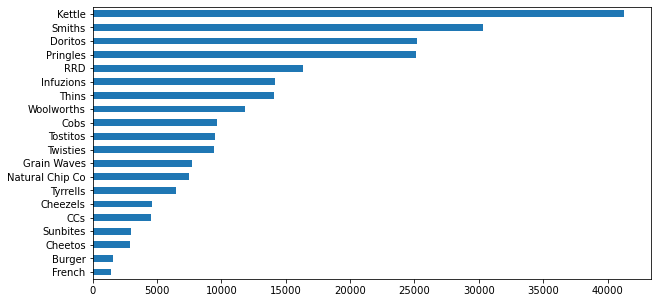

In [61]:
data["Cleaned_Brand_Names"].value_counts(ascending=True).plot.barh(figsize=(10,5))

drawing insights on
1. who spends the most on chips (total sales)
2. describing customers by lifestage and how premium their general purchasing behaviour is
3. how many customers are in each segment
4. how many chips are bought per customer by segment
5. What's the average chip price by customer segment

In [62]:
grouped_sales = pd.DataFrame(data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].agg(["sum", "mean"]))
grouped_sales.sort_values(ascending=False, by="sum")

sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
OLDER FAMILIES         Budget            156863.75  7.291241
YOUNG SINGLES/COUPLES  Mainstream        147582.20  7.551279
RETIREES               Mainstream        145168.95  7.269352
YOUNG FAMILIES         Budget            129717.95  7.302705
OLDER SINGLES/COUPLES  Budget            127833.60  7.444305
                       Mainstream        124648.50  7.306049
                       Premium           123537.55  7.459997
RETIREES               Budget            105916.30  7.445786
OLDER FAMILIES         Mainstream         96413.55  7.281440
RETIREES               Premium            91296.65  7.461315
YOUNG FAMILIES         Mainstream         86338.25  7.226772
MIDAGE SINGLES/COUPLES Mainstream         84734.25  7.637156
YOUNG FAMILIES         Premium            78571.70  7.285951
OLDER FAMILIES         Premium            75242.60  7.232779
YOUNG SINGLES/COUPLES  Budget             57122.10  6.663023
MIDAGE SINGLES/COUPLES Premium            54443.85  7.152371
YOUNG SINGLES/COUPLES  Premium            39052.30  6.673325
MIDAGE SINGLES/COUPLES Budget             33345.70  7.108442
NEW FAMILIES           Budget             20607.45  7.297256
                       Mainstream         15979.70  7.313364
                       Premium            10760.80  7.231720

In [63]:
grouped_sales["sum"].sum()

1805177.7

<AxesSubplot:ylabel='LIFESTAGE,PREMIUM_CUSTOMER'>

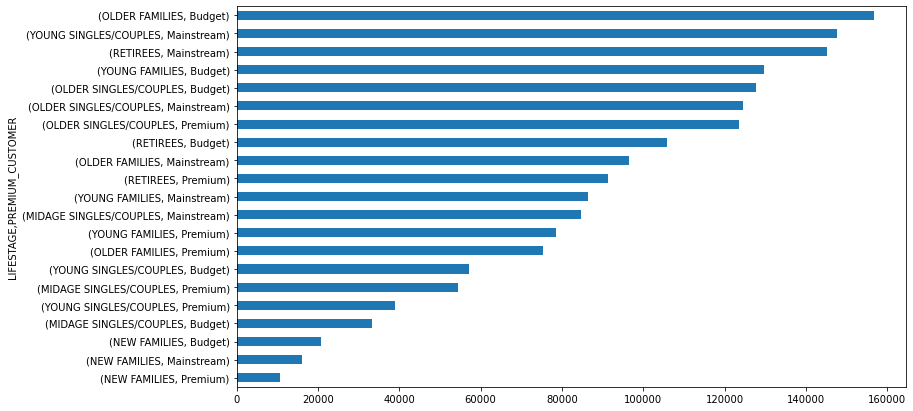

In [64]:
grouped_sales["sum"].sort_values().plot.barh(figsize=(12,7))

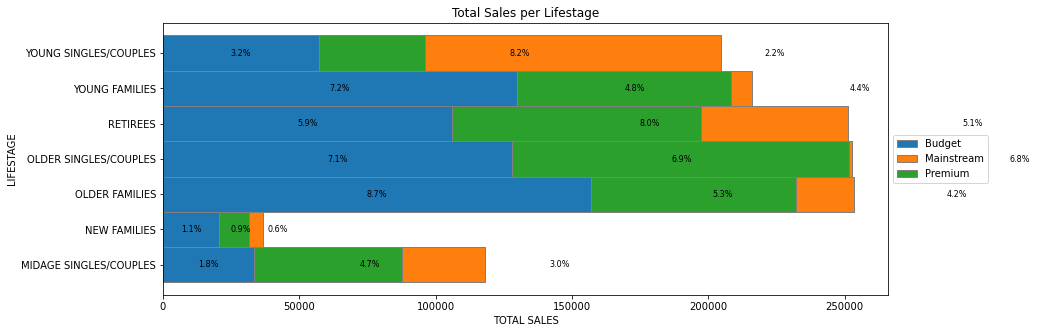

In [65]:
# Values of each group
bars1 = grouped_sales[grouped_sales.index.get_level_values("PREMIUM_CUSTOMER") == "Budget"]["sum"]
bars2 = grouped_sales[grouped_sales.index.get_level_values("PREMIUM_CUSTOMER") == "Mainstream"]["sum"]
bars3 = grouped_sales[grouped_sales.index.get_level_values("PREMIUM_CUSTOMER") == "Premium"]["sum"]
 
bars1_text = (bars1 / sum(grouped_sales["sum"])).apply("{:.1%}".format)
bars2_text = (bars2 / sum(grouped_sales["sum"])).apply("{:.1%}".format)
bars3_text = (bars3 / sum(grouped_sales["sum"])).apply("{:.1%}".format)
 
# Names of group and bar width
names = grouped_sales.index.get_level_values("LIFESTAGE").unique()

# The position of the bars on the x-axis
r = np.arange(len(names))

plt.figure(figsize=(13,5)) 

# Create brown bars
budget_bar = plt.barh(r, bars1, edgecolor='grey', height=1, label="Budget")
# Create green bars (middle), on top of the firs ones
mains_bar = plt.barh(r, bars2, left=bars1, edgecolor='grey', height=1, label="Mainstream")
# Create green bars (top)
prem_bar = plt.barh(r, bars3, left=bars1, edgecolor='grey', height=1, label="Premium")
    
for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, bars1_text[i], va='center', ha='center', size=8)
    plt.text(budget_width + mains_bar[i].get_width()/2, i, bars2_text[i], va='center', ha='center', size=8)
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, bars3_text[i], va='center', ha='center', size=8)
    
# Custom X axis
plt.yticks(r, names)
plt.ylabel("LIFESTAGE")
plt.xlabel("TOTAL SALES")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.title("Total Sales per Lifestage")

plt.savefig("lifestage_sales.png", bbox_inches="tight")

# Show graphic
plt.show()

In [66]:
stage_agg_prem = data.groupby("LIFESTAGE")["PREMIUM_CUSTOMER"].agg(pd.Series.mode).sort_values()
print("Top contributor per LIFESTAGE by PREMIUM category")
print(stage_agg_prem)

Top contributor per LIFESTAGE by PREMIUM category
LIFESTAGE
NEW FAMILIES                  Budget
OLDER FAMILIES                Budget
OLDER SINGLES/COUPLES         Budget
YOUNG FAMILIES                Budget
MIDAGE SINGLES/COUPLES    Mainstream
RETIREES                  Mainstream
YOUNG SINGLES/COUPLES     Mainstream
Name: PREMIUM_CUSTOMER, dtype: object


The top 3 total sales contributor segment are (in order):
- Older families (Budget) \$156,864
- Young Singles/Couples (Mainstream) \$147,582
- Retirees (Mainstream) \$145,169

In [67]:
unique_cust = data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique().sort_values(ascending=False)
pd.DataFrame(unique_cust)

LYLTY_CARD_NBR
LIFESTAGE              PREMIUM_CUSTOMER                
YOUNG SINGLES/COUPLES  Mainstream                  7917
RETIREES               Mainstream                  6358
OLDER SINGLES/COUPLES  Mainstream                  4858
                       Budget                      4849
                       Premium                     4682
OLDER FAMILIES         Budget                      4611
RETIREES               Budget                      4385
YOUNG FAMILIES         Budget                      3953
RETIREES               Premium                     3812
YOUNG SINGLES/COUPLES  Budget                      3647
MIDAGE SINGLES/COUPLES Mainstream                  3298
OLDER FAMILIES         Mainstream                  2788
YOUNG FAMILIES         Mainstream                  2685
YOUNG SINGLES/COUPLES  Premium                     2480
YOUNG FAMILIES         Premium                     2398
MIDAGE SINGLES/COUPLES Premium                     2369
OLDER FAMILIES         Premium                     2231
MIDAGE SINGLES/COUPLES Budget                      1474
NEW FAMILIES           Budget                      1087
                       Mainstream                   830
                       Premium                      575

<AxesSubplot:ylabel='LIFESTAGE,PREMIUM_CUSTOMER'>

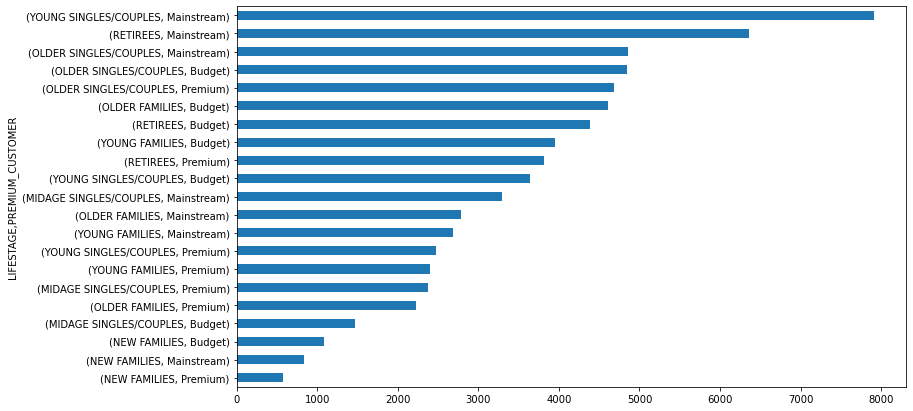

In [68]:
unique_cust.sort_values().plot.barh(figsize=(12,7))

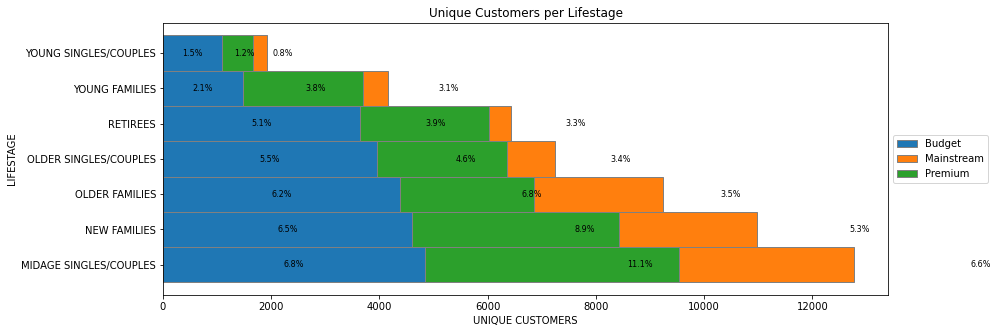

In [69]:
# Values of each group
ncust_bars1 = unique_cust[unique_cust.index.get_level_values("PREMIUM_CUSTOMER") == "Budget"]
ncust_bars2 = unique_cust[unique_cust.index.get_level_values("PREMIUM_CUSTOMER") == "Mainstream"]
ncust_bars3 = unique_cust[unique_cust.index.get_level_values("PREMIUM_CUSTOMER") == "Premium"]
 
ncust_bars1_text = (ncust_bars1 / sum(unique_cust)).apply("{:.1%}".format)
ncust_bars2_text = (ncust_bars2 / sum(unique_cust)).apply("{:.1%}".format)
ncust_bars3_text = (ncust_bars3 / sum(unique_cust)).apply("{:.1%}".format)
 
plt.figure(figsize=(13,5)) 

# Create brown bars
budget_bar = plt.barh(r, ncust_bars1, edgecolor='grey', height=1, label="Budget")
# Create green bars (middle), on top of the firs ones
mains_bar = plt.barh(r, ncust_bars2, left=ncust_bars1, edgecolor='grey', height=1, label="Mainstream")
# # Create green bars (top)
prem_bar = plt.barh(r, ncust_bars3, left=ncust_bars1, edgecolor='grey', height=1, label="Premium")
    
for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, ncust_bars1_text[i], va='center', ha='center', size=8)
    plt.text(budget_width + mains_bar[i].get_width()/2, i, ncust_bars2_text[i], va='center', ha='center', size=8)
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, ncust_bars3_text[i], va='center', ha='center', size=8)
    
# Custom X axis
plt.yticks(r, names)
plt.ylabel("LIFESTAGE")
plt.xlabel("UNIQUE CUSTOMERS")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.title("Unique Customers per Lifestage")

plt.savefig("lifestage_customers.png", bbox_inches="tight")

# # Show graphic
plt.show()

The high sales amount by segment "Young Singles/Couples - Mainstream" and "Retirees - Mainstream" are due to their large number of unique customers, but not for the "Older - Budget" segment. Next we'll explore if the "Older - Budget" segment has:
- High Frequency of Purchase and,
- Average Sales per Customer compared to the other segment.

In [70]:
freq_per_cust = data.groupby(["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER"]).count()["DATE"]
freq_per_cust.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg(["mean", "count"]).sort_values(ascending=False, by="mean")

mean  count
LIFESTAGE              PREMIUM_CUSTOMER                 
OLDER FAMILIES         Mainstream        4.749283   2788
                       Budget            4.665799   4611
                       Premium           4.662931   2231
YOUNG FAMILIES         Premium           4.497081   2398
                       Budget            4.493549   3953
                       Mainstream        4.449534   2685
OLDER SINGLES/COUPLES  Budget            3.541349   4849
                       Premium           3.536950   4682
                       Mainstream        3.511939   4858
MIDAGE SINGLES/COUPLES Mainstream        3.364160   3298
RETIREES               Budget            3.244014   4385
MIDAGE SINGLES/COUPLES Premium           3.213170   2369
RETIREES               Premium           3.209864   3812
MIDAGE SINGLES/COUPLES Budget            3.182497   1474
RETIREES               Mainstream        3.140925   6358
NEW FAMILIES           Mainstream        2.632530    830
                       Budget            2.597976   1087
                       Premium           2.587826    575
YOUNG SINGLES/COUPLES  Mainstream        2.468612   7917
                       Premium           2.359677   2480
                       Budget            2.350699   3647

The above table describes the "Average frequency of Purchase per segment" and "Unique customer per segment". The top three most frequent purchase is contributed by the "Older Families" lifestage segment. We can see now that the "Older - Budget" segment contributes to high sales partly because of the combination of:
- High Frequency of Purchase and,
- Fairly high unique number of customer in the segment

In [71]:
grouped_sales.sort_values(ascending=False, by="mean")

,,sum,mean
LIFESTAGE,PREMIUM_CUSTOMER,,
MIDAGE SINGLES/COUPLES,Mainstream,84734.25,7.637156
YOUNG SINGLES/COUPLES,Mainstream,147582.20,7.551279
RETIREES,Premium,91296.65,7.461315
OLDER SINGLES/COUPLES,Premium,123537.55,7.459997
RETIREES,Budget,105916.30,7.445786
OLDER SINGLES/COUPLES,Budget,127833.60,7.444305
NEW FAMILIES,Mainstream,15979.70,7.313364
OLDER SINGLES/COUPLES,Mainstream,124648.50,7.306049
YOUNG FAMILIES,Budget,129717.95,7.302705


Highest average spending per purchase are contributed by the Midage and Young "Singles/Couples". The difference between their Mainstream and Non-Mainstream group might seem insignificant (7.6 vs 6.6), but we'll find out by examining if the difference is statistically significant.

In [72]:
# Performing t test analysis
from scipy.stats import ttest_ind

mainstream = data["PREMIUM_CUSTOMER"] == "Mainstream"
young_midage = (data["LIFESTAGE"] == "MIDAGE SINGLES/COUPLES") | (data["LIFESTAGE"] == "YOUNG SINGLES/COUPLES")

budget_premium = (data["PREMIUM_CUSTOMER"] == "Budget") | (data["PREMIUM_CUSTOMER"] == "Premium")

a = data[young_midage & mainstream]["TOT_SALES"]
b = data[young_midage & budget_premium]["TOT_SALES"]
stat, pval = ttest_ind(a.values, b.values, equal_var=False)

print(pval)

1.8346459081757317e-237


Here, as the p-value is close to 0. There is a statistically significant difference to the Total Sales between the "Mainstream Young Midage" segment to the "Budget and Premium Young Midage" segment.

In [73]:
# let's examine what brand of chips the top 3 segments contributing to Total Sales are buying
data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["Cleaned_Brand_Names"].agg(pd.Series.mode).sort_values()

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget              Kettle
YOUNG SINGLES/COUPLES   Budget              Kettle
YOUNG FAMILIES          Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
RETIREES                Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
OLDER SINGLES/COUPLES   Premium             Kettle
YOUNG SINGLES/COUPLES   Mainstream          Kettle
OLDER SINGLES/COUPLES   Mainstream          Kettle
OLDER FAMILIES          Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
NEW FAMILIES            Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
MIDAGE SINGLES/COUPLES  Premium             Kettle
                        Mainstream       

========== YOUNG SINGLES/COUPLES - Premium ==========
Kettle      838
Smiths      787
Pringles    537
Name: Cleaned_Brand_Names, dtype: int64


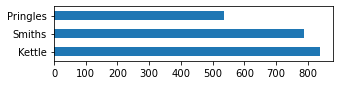

========== YOUNG SINGLES/COUPLES - Budget ==========
Kettle      1211
Smiths      1185
Pringles     832
Name: Cleaned_Brand_Names, dtype: int64


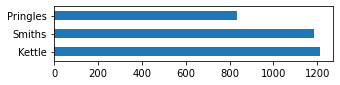

========== YOUNG SINGLES/COUPLES - Mainstream ==========
Kettle      3844
Doritos     2379
Pringles    2315
Name: Cleaned_Brand_Names, dtype: int64


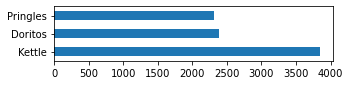

========== MIDAGE SINGLES/COUPLES - Premium ==========
Kettle      1206
Smiths       923
Pringles     781
Name: Cleaned_Brand_Names, dtype: int64


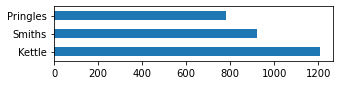

========== MIDAGE SINGLES/COUPLES - Budget ==========
Kettle     713
Smiths     591
Doritos    479
Name: Cleaned_Brand_Names, dtype: int64


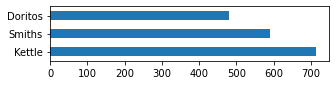

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
Kettle     2136
Smiths     1276
Doritos    1210
Name: Cleaned_Brand_Names, dtype: int64


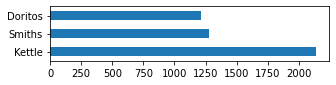

========== NEW FAMILIES - Premium ==========
Kettle      247
Pringles    165
Smiths      155
Name: Cleaned_Brand_Names, dtype: int64


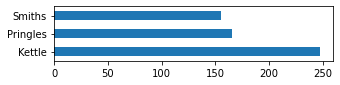

========== NEW FAMILIES - Budget ==========
Kettle     510
Smiths     328
Doritos    315
Name: Cleaned_Brand_Names, dtype: int64


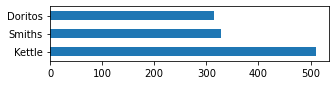

========== NEW FAMILIES - Mainstream ==========
Kettle     414
Doritos    257
Smiths     244
Name: Cleaned_Brand_Names, dtype: int64


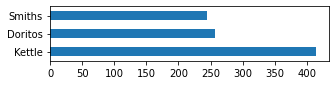

========== OLDER FAMILIES - Premium ==========
Kettle      1512
Smiths      1448
Pringles    1014
Name: Cleaned_Brand_Names, dtype: int64


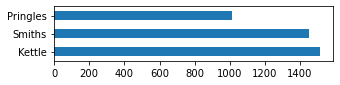

========== OLDER FAMILIES - Budget ==========
Kettle     3320
Smiths     2948
Doritos    2032
Name: Cleaned_Brand_Names, dtype: int64


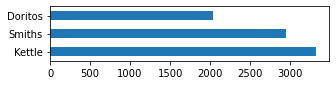

========== OLDER FAMILIES - Mainstream ==========
Kettle     2019
Smiths     1742
Doritos    1263
Name: Cleaned_Brand_Names, dtype: int64


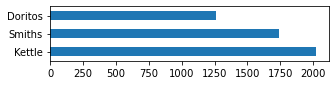

========== OLDER SINGLES/COUPLES - Premium ==========
Kettle     2947
Smiths     1952
Doritos    1784
Name: Cleaned_Brand_Names, dtype: int64


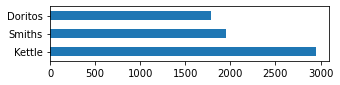

========== OLDER SINGLES/COUPLES - Budget ==========
Kettle      3065
Smiths      2010
Pringles    1843
Name: Cleaned_Brand_Names, dtype: int64


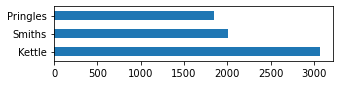

========== OLDER SINGLES/COUPLES - Mainstream ==========
Kettle     2835
Smiths     2070
Doritos    1791
Name: Cleaned_Brand_Names, dtype: int64


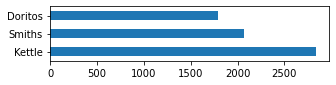

========== RETIREES - Premium ==========
Kettle      2216
Smiths      1395
Pringles    1331
Name: Cleaned_Brand_Names, dtype: int64


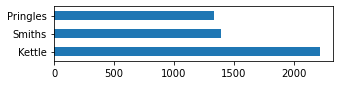

========== RETIREES - Budget ==========
Kettle     2592
Smiths     1612
Doritos    1592
Name: Cleaned_Brand_Names, dtype: int64


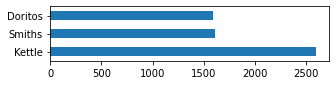

========== RETIREES - Mainstream ==========
Kettle      3386
Smiths      2367
Pringles    2103
Name: Cleaned_Brand_Names, dtype: int64


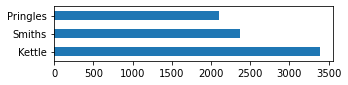

========== YOUNG FAMILIES - Premium ==========
Kettle      1745
Smiths      1384
Pringles    1007
Name: Cleaned_Brand_Names, dtype: int64


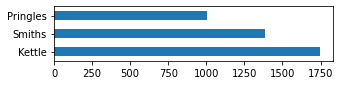

========== YOUNG FAMILIES - Budget ==========
Kettle     2743
Smiths     2334
Doritos    1767
Name: Cleaned_Brand_Names, dtype: int64


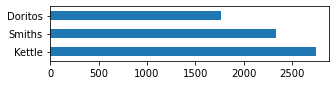

========== YOUNG FAMILIES - Mainstream ==========
Kettle      1789
Smiths      1681
Pringles    1148
Name: Cleaned_Brand_Names, dtype: int64


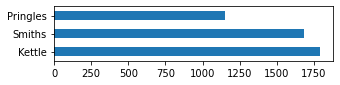

In [74]:
for stage in data["LIFESTAGE"].unique():
    for prem in data["PREMIUM_CUSTOMER"].unique():
        print('==========',stage, '-', prem,'==========')
        summary = data[(data["LIFESTAGE"] == stage) & (data["PREMIUM_CUSTOMER"] == prem)]["Cleaned_Brand_Names"].value_counts().head(3)
        print(summary)
        plt.figure()
        summary.plot.barh(figsize=(5,1))
        plt.show()

- Every segment had Kettle as the most purchased brand. 
- Every segment except "YOUNG SINGLES/COUPLES Mainstream" had Smiths as their second most purchased brand.
- "YOUNG SINGLES/COUPLES Mainstream" had Doritos as their second most purchased brand.

========== YOUNG SINGLES/COUPLES - Premium ==========
134.0     537
150.0     896
175.0    1587
Name: Pack_Size, dtype: int64


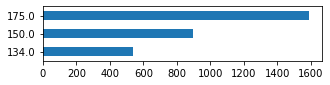

========== YOUNG SINGLES/COUPLES - Budget ==========
134.0     832
150.0    1325
175.0    2262
Name: Pack_Size, dtype: int64


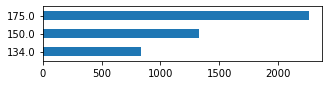

========== YOUNG SINGLES/COUPLES - Mainstream ==========
134.0    2315
150.0    2998
175.0    4928
Name: Pack_Size, dtype: int64


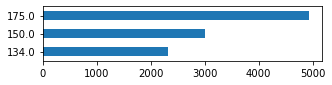

========== MIDAGE SINGLES/COUPLES - Premium ==========
134.0     781
150.0    1163
175.0    2034
Name: Pack_Size, dtype: int64


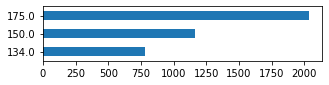

========== MIDAGE SINGLES/COUPLES - Budget ==========
134.0     449
150.0     746
175.0    1256
Name: Pack_Size, dtype: int64


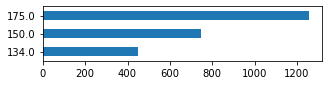

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
134.0    1159
150.0    1714
175.0    2912
Name: Pack_Size, dtype: int64


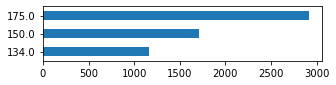

========== NEW FAMILIES - Premium ==========
134.0    165
150.0    225
175.0    371
Name: Pack_Size, dtype: int64


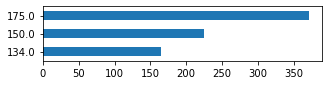

========== NEW FAMILIES - Budget ==========
134.0    309
150.0    425
175.0    763
Name: Pack_Size, dtype: int64


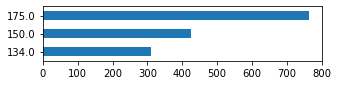

========== NEW FAMILIES - Mainstream ==========
134.0    224
150.0    362
175.0    579
Name: Pack_Size, dtype: int64


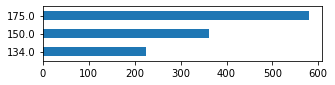

========== OLDER FAMILIES - Premium ==========
134.0    1014
150.0    1607
175.0    2747
Name: Pack_Size, dtype: int64


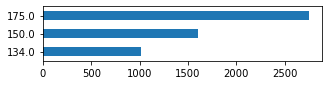

========== OLDER FAMILIES - Budget ==========
134.0    1996
150.0    3414
175.0    5662
Name: Pack_Size, dtype: int64


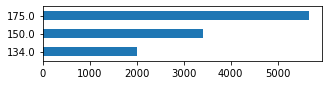

========== OLDER FAMILIES - Mainstream ==========
134.0    1234
150.0    2091
175.0    3489
Name: Pack_Size, dtype: int64


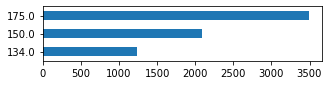

========== OLDER SINGLES/COUPLES - Premium ==========
134.0    1744
150.0    2672
175.0    4382
Name: Pack_Size, dtype: int64


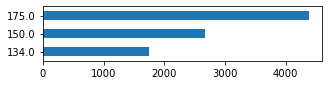

========== OLDER SINGLES/COUPLES - Budget ==========
134.0    1843
150.0    2726
175.0    4535
Name: Pack_Size, dtype: int64


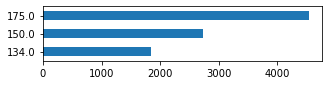

========== OLDER SINGLES/COUPLES - Mainstream ==========
134.0    1720
150.0    2660
175.0    4422
Name: Pack_Size, dtype: int64


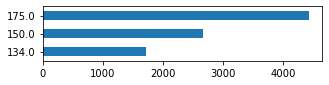

========== RETIREES - Premium ==========
134.0    1331
150.0    1883
175.0    3232
Name: Pack_Size, dtype: int64


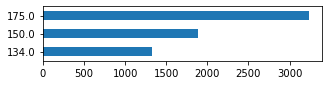

========== RETIREES - Budget ==========
134.0    1517
150.0    2242
175.0    3768
Name: Pack_Size, dtype: int64


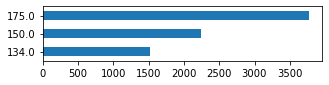

========== RETIREES - Mainstream ==========
134.0    2103
150.0    3183
175.0    5187
Name: Pack_Size, dtype: int64


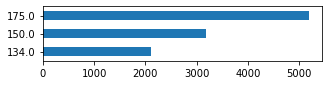

========== YOUNG FAMILIES - Premium ==========
134.0    1007
150.0    1697
175.0    2926
Name: Pack_Size, dtype: int64


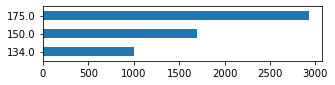

========== YOUNG FAMILIES - Budget ==========
134.0    1674
150.0    2749
175.0    4800
Name: Pack_Size, dtype: int64


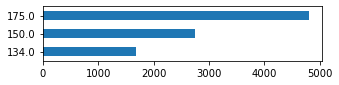

========== YOUNG FAMILIES - Mainstream ==========
134.0    1148
150.0    1927
175.0    3087
Name: Pack_Size, dtype: int64


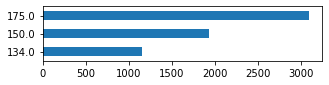

In [75]:
# finding out the pack size preferences of different segments
pack_size = pd.concat([data, pack_sizes.rename("Pack_Size")], axis=1)

for stage in data["LIFESTAGE"].unique():
    for prem in data["PREMIUM_CUSTOMER"].unique():
        print('==========',stage, '-', prem,'==========')
        summary = pack_size[(pack_size["LIFESTAGE"] == stage) & (pack_size["PREMIUM_CUSTOMER"] == prem)]["Pack_Size"].value_counts().head(3).sort_index()
        print(summary)
        plt.figure()
        summary.plot.barh(figsize=(5,1))
        plt.show()

All of the segments prefer the 175gr pack size chips, followed by the 150gr size.

In [76]:
# let's find out average amount of chips bought per customer segment
temp = data.reset_index().rename(columns = {"index": "transaction"})
temp["Segment"] = temp["LIFESTAGE"] + ' - ' + temp['PREMIUM_CUSTOMER']
segment_brand_encode = pd.concat([pd.get_dummies(temp["Segment"]), pd.get_dummies(temp["Cleaned_Brand_Names"])], axis=1)
set_temp = temp["Segment"].unique()

(temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PROD_QTY"].sum() / temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique()).sort_values(ascending=False)

LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Mainstream          9.255380
                        Budget              9.076773
                        Premium             9.071717
YOUNG FAMILIES          Budget              8.722995
                        Premium             8.716013
                        Mainstream          8.638361
OLDER SINGLES/COUPLES   Budget              6.781398
                        Premium             6.769543
                        Mainstream          6.712021
MIDAGE SINGLES/COUPLES  Mainstream          6.432080
RETIREES                Budget              6.141847
                        Premium             6.103358
MIDAGE SINGLES/COUPLES  Premium             6.078514
                        Budget              6.026459
RETIREES                Mainstream          5.925920
NEW FAMILIES            Mainstream          4.891566
                        Budget              4.821527
                        Premium             4.815652
YOUNG

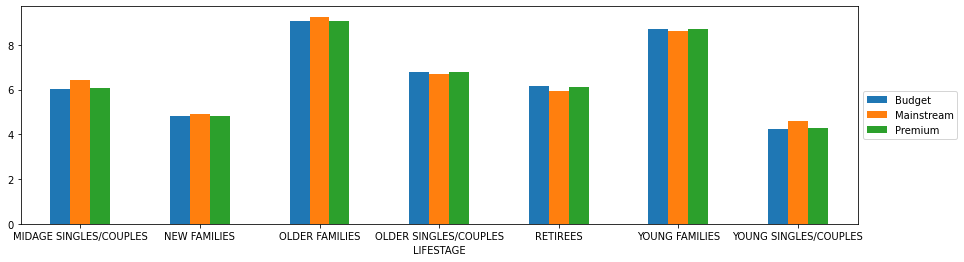

In [77]:
(temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PROD_QTY"].sum() / temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique()).unstack().plot.bar(figsize=(15,4), rot=0)
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.savefig("Average purchase quantity per segment.png", bbox_inches="tight")

In [78]:
# Average chips price per transaction by segments
temp["Unit_Price"] = temp["TOT_SALES"] / temp["PROD_QTY"]
temp.groupby(["Segment"]).mean()["Unit_Price"].sort_values(ascending=False)

Segment
YOUNG SINGLES/COUPLES - Mainstream     4.065642
MIDAGE SINGLES/COUPLES - Mainstream    3.994241
RETIREES - Budget                      3.924404
RETIREES - Premium                     3.920942
NEW FAMILIES - Budget                  3.917688
NEW FAMILIES - Mainstream              3.916133
OLDER SINGLES/COUPLES - Premium        3.893182
OLDER SINGLES/COUPLES - Budget         3.882096
NEW FAMILIES - Premium                 3.872110
RETIREES - Mainstream                  3.844294
OLDER SINGLES/COUPLES - Mainstream     3.814665
MIDAGE SINGLES/COUPLES - Premium       3.770698
YOUNG FAMILIES - Premium               3.762150
YOUNG FAMILIES - Budget                3.760737
OLDER FAMILIES - Budget                3.745340
MIDAGE SINGLES/COUPLES - Budget        3.743328
OLDER FAMILIES - Mainstream            3.737077
YOUNG FAMILIES - Mainstream            3.724533
OLDER FAMILIES - Premium               3.717000
YOUNG SINGLES/COUPLES - Premium        3.665414
YOUNG SINGLES/COUPLES - Budget  

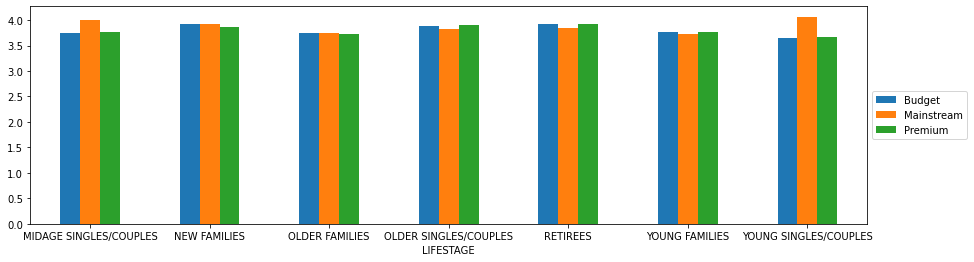

In [79]:
temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).mean()["Unit_Price"].unstack().plot.bar(figsize=(15,4), rot=0)
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))

# Insights

- Top 3 total sales contributor segment are
   - Older families (Budget) \$156,864
   - Young Singles/Couples (Mainstream) \$147,582
   - Retirees (Mainstream) \$145,169
- Young Singles/Couples (Mainstream) has the highest population, followed by Retirees (Mainstream). Which explains their high total sales.
- Despite Older Families not having the highest population, they have the highest frequency of purchase, which contributes to their high total sales.
- Older Families followed by Young Families has the highest average quantity of chips bought per purchase.
- The Mainstream category of the "Young and Midage Singles/Couples" have the highest spending of chips per purchase. And the difference to the non-Mainstream "Young and Midage Singles/Couples" are statistically significant.
- Chips brand Kettle is dominating every segment as the most purchased brand.
- Observing the 2nd most purchased brand, "Young and Midage Singles/Couples" is the only segment with a different preference (Doritos) as compared to others' (Smiths).
- Most frequent chip size purchased is 175gr followed by the 150gr chip size for all segments.

# Reccomendations

- Older Families:
    - Focus on the Budget segment.
    - Strength: Frequent purchase. We can give promotions that encourages more frequency of purchase.
    - Strength: High quantity of chips purchased per visit. We can give promotions that encourage them to buy more quantity of chips per purchase.
- Young Singles/Couples:
    - Focus on the Mainstream segment.
    - This segment is the only segment that had Doritos as their 2nd most purchased brand (after Kettle). To specifically target this segment it might be a good idea to collaborate with Doritos merchant to do some branding promotion catered to "Young Singles/Couples - Mainstream" segment.
    - Strength: Population quantity. We can spend more effort on making sure our promotions reach them, and it reaches them frequently.
- Retirees:
    - Focus on the Mainstream segment.
    - Strength: Population quantity. Again, since their population quantity is the contributor to the high total sales, we should spend more effort on making sure our promotions reaches as many of them as possible and frequent.
- General:
    - All segments has Kettle as the most frequently purchased brand, and 175gr (regardless of brand) followed by 150gr as the preferred chip size.
    - When promoting chips in general to all segments it is good to take advantage of these two points.

In [80]:
x = temp.groupby(["Segment", "Cleaned_Brand_Names"]).sum()["TOT_SALES"].sort_values(ascending=False).reset_index()
x[x["Segment"] == "YOUNG SINGLES/COUPLES - Mainstream"]

,Segment,Cleaned_Brand_Names,TOT_SALES
0,YOUNG SINGLES/COUPLES - Mainstream,Kettle,35423.6
8,YOUNG SINGLES/COUPLES - Mainstream,Doritos,20925.9
22,YOUNG SINGLES/COUPLES - Mainstream,Pringles,16006.2
24,YOUNG SINGLES/COUPLES - Mainstream,Smiths,14958.9
54,YOUNG SINGLES/COUPLES - Mainstream,Infuzions,8749.4
61,YOUNG SINGLES/COUPLES - Mainstream,Twisties,7539.8
69,YOUNG SINGLES/COUPLES - Mainstream,Tostitos,7238.0
70,YOUNG SINGLES/COUPLES - Mainstream,Thins,7217.1
84,YOUNG SINGLES/COUPLES - Mainstream,Cobs,6144.6
115,YOUNG SINGLES/COUPLES - Mainstream,Tyrrells,4800.6
